<a href="https://colab.research.google.com/github/IsaiasSaraiva/Aprendizado-de-Maquina-Consumo-de-Cerveja./blob/main/C%C3%A2ncer_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
dados = pd.read_csv('The_Cancer_data_1500_V2.csv')

In [5]:
dados.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [8]:
dados.count()

Age                 1500
Gender              1500
BMI                 1500
Smoking             1500
GeneticRisk         1500
PhysicalActivity    1500
AlcoholIntake       1500
CancerHistory       1500
Diagnosis           1500
dtype: int64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    dados[['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity', 'AlcoholIntake', 'CancerHistory' ]],
    dados[['Diagnosis']],
    test_size=0.2,
    random_state=42
)

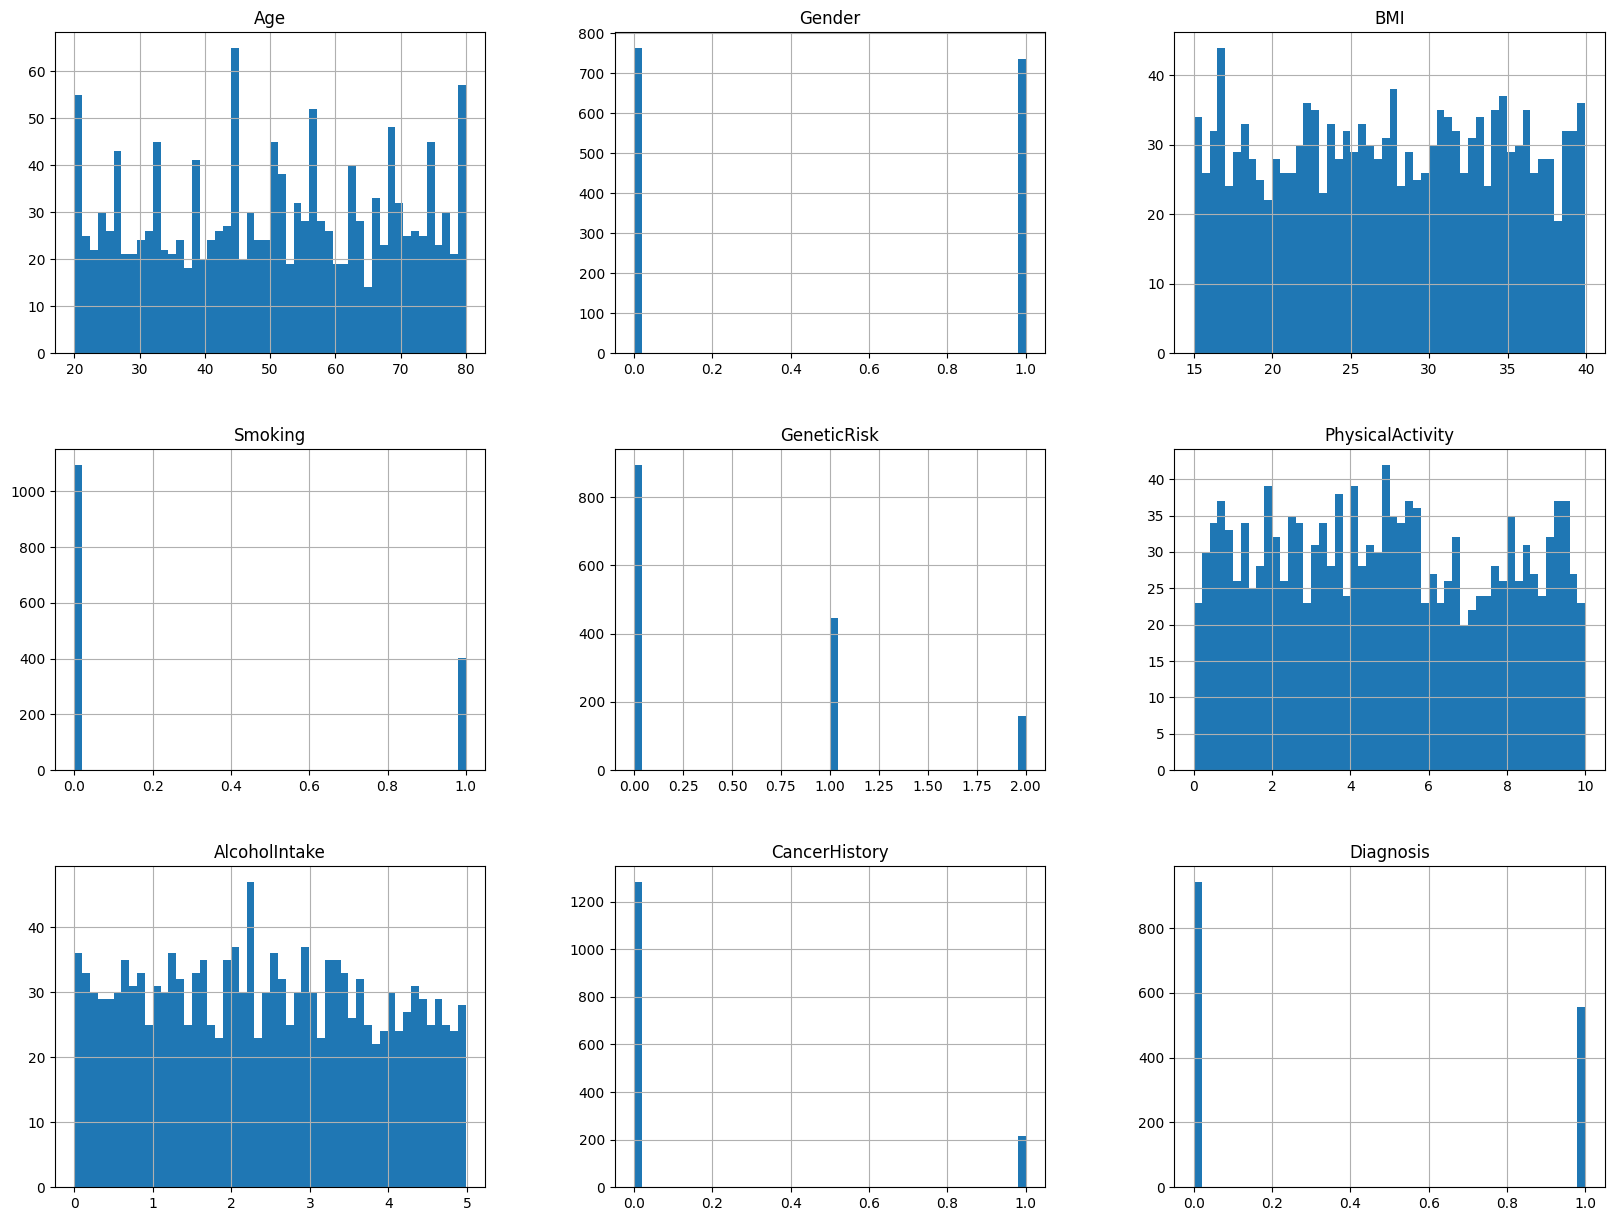

In [10]:
dados.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
modelo_arvore = DecisionTreeRegressor()

In [13]:
modelo_rede = tf.keras.Sequential([
    tf.keras.layers.Dense(129, activation='relu', input_shape=[8]),
    tf.keras.layers.Dense(78, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [14]:
modelo_rede.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 129)               1161      
                                                                 
 dense_1 (Dense)             (None, 78)                10140     
                                                                 
 dense_2 (Dense)             (None, 25)                1975      
                                                                 
 dense_3 (Dense)             (None, 12)                312       
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 13601 (53.13 KB)
Trainable params: 13601 (53.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
modelo_rede.compile(optimizer='adam', loss='mse')

In [16]:
modelo_arvore.fit(x_train, y_train)

DecisionTreeRegressor()

In [17]:
modelo_rede.fit(x_train, y_train, epochs=2000, verbose=1, batch_size=79)

Epoch 1/2000
16/16 [==============================] - 1s 3ms/step - loss: 0.5259
Epoch 2/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.2264
Epoch 3/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.2033
Epoch 4/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.1934
Epoch 5/2000
16/16 [==============================] - 0s 3ms/step - loss: 0.1928
Epoch 6/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.1825
Epoch 7/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.1793
Epoch 8/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.1695
Epoch 9/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.1678
Epoch 10/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.1549
Epoch 11/2000
16/16 [==============================] - 0s 3ms/step - loss: 0.1499
Epoch 12/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.1686
Epoch 13/2000
16/16 [====

In [18]:
previsoes_arvore = modelo_arvore.predict(x_test)
previsoes_rede = modelo_rede.predict(x_test)

10/10 [==============================] - 0s 5ms/step


In [19]:
MAE_rede = mean_absolute_error(y_test, previsoes_rede)
MSE_rede = mean_squared_error(y_test, previsoes_rede)
R2_rede = r2_score(y_test, previsoes_rede)

MAE_arvore = mean_absolute_error(y_test, previsoes_arvore)
MSE_arvore = mean_squared_error(y_test, previsoes_arvore)
R2_arvore = r2_score(y_test, previsoes_arvore)

In [20]:
print(f'O resultado do erro médio absoluto do algoritmo árvore de decisão é: {MAE_arvore}')
print(f'O resultado do erro médio quadrático do algoritmo árvore de decisão é: {MSE_arvore}')
print(f'O resultado do coeficiente de detemrinação do algorimto árvore de decisão pe : {R2_arvore}')
print(f'-------------------------------------------------------------------------------------------')
print(f'O resultado do erro médio absoluto do algoritmo rede neural é: {MAE_rede}')
print(f'O resultado do erro médio quadrático do algoritmo rede neural é : {MSE_rede}')
print(f'O resultado do coeficiente de determinação do algoritmo rede neural é: {R2_rede}')

O resultado do erro médio absoluto do algoritmo árvore de decisão é: 0.11666666666666667
O resultado do erro médio quadrático do algoritmo árvore de decisão é: 0.11666666666666667
O resultado do coeficiente de detemrinação do algorimto árvore de decisão pe : 0.5080584707646176
-------------------------------------------------------------------------------------------
O resultado do erro médio absoluto do algoritmo rede neural é: 0.16964963629841803
O resultado do erro médio quadrático do algoritmo rede neural é : 0.1180115822555851
O resultado do coeficiente de determinação do algoritmo rede neural é: 0.5023874436374316


In [21]:
dados.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [25]:
novos_dados = pd.DataFrame({'Age' :[52], 'Gender' : [1], 'BMI' : [18.095413], 'Smoking': [0], 'GeneticRisk' : [1], 'PhysicalActivity' : [6.904732], 'AlcoholIntake' : [4.728368], 'CancerHistory': [1]})
novas_previsoes_arvore = modelo_arvore.predict(novos_dados)
novas_previsoes_rede = modelo_rede.predict(novos_dados)
print(f'O resultado da previsão do algoritmo árvore de decisão pé : {novas_previsoes_arvore}')
print(f'O resultado da previsão do algoritmo rede neural é: {novas_previsoes_rede}')

1/1 [==============================] - 0s 20ms/step
O resultado da previsão do algoritmo árvore de decisão pé : [1.]
O resultado da previsão do algoritmo rede neural é: [[1.019154]]
